# X-ray scattering

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import astropy.units as u
from scipy import stats
from scipy.optimize import curve_fit

In [2]:
# Type in data
n = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9])
phi = np.array([12, 22, 25, 38, 46, 72, 77, 86, 135]) * np.pi / 180 #radians
phi_err = np.array([2,4,5,6,7,10,12,16,18]) #degrees

In [3]:
# Error in y = sin(phi / 2) due to error propagation
sin_phi_err = 0.5*np.cos(phi/2) * phi_err * np.pi / 180 # radians

Text(0, 0.5, 'sin($\\phi / 2$)')

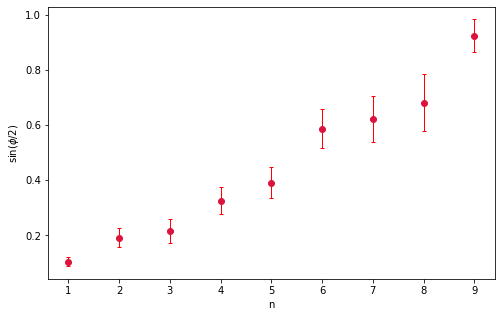

In [4]:
figure = plt.figure(figsize=(8, 5))

plt.plot(n,np.sin(phi/2),'o', c = 'crimson')
plt.errorbar(n,np.sin(phi/2),yerr=sin_phi_err,fmt='none', ecolor='r', elinewidth=1, capsize=2)
# add labels and title
plt.xlabel('n')
plt.ylabel('sin($\phi / 2$)')

In [5]:
# Fit y = m*x + c to calculate d

def linear(x, m, c):  
    y =  m*x + c
    return y

popt,pcov = curve_fit(linear, n, np.sin(phi/2))
error = np.sqrt(pcov.diagonal())

Text(0, 0.5, 'sin($\\phi / 2$)')

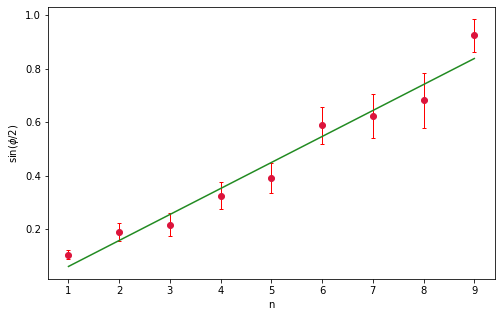

In [6]:
figure = plt.figure(figsize=(8, 5))

plt.plot(n,np.sin(phi/2),'o', c = 'crimson')
plt.errorbar(n,np.sin(phi/2),yerr=sin_phi_err,fmt='none', ecolor='r', elinewidth=1, capsize=2)
plt.plot(n, linear(n, popt[0], popt[1]), label='fit', c = 'forestgreen')
# add labels and title
plt.xlabel('n')
plt.ylabel('sin($\phi / 2$)')

In [7]:
wl = 0.0711 #nm
d = wl/(2*popt[0])
d_err = error[0] * wl/(2*popt[0]**2) # error propagation
print(f"d = {d:.2f} ± {d_err:.2f} nm") # random error - but also systematic error from slope?

d = 0.37 ± 0.03 nm


# Ohm's Law

There are two cases here, depending on how you interpreted the question. Both are fine (the question should have been more clear :) ).

### Case 1: The systematic error is the same for both $V$ and $R$, as $S$.
The covariance matrx is
$$ Cov(V,R) = 
\begin{pmatrix}
\sigma_V^2 + S^2 & S^2 \\
S^2 & \sigma_R^2 + S^2
\end{pmatrix}
= 
\begin{pmatrix}
(0.3)^2 + (0.2)^2 & (0.2)^2 \\
(0.2)^2 & (0.2 \times 1000)^2 + (0.2)^2
\end{pmatrix}
$$

### Case 2: The systematic error is only present in $V$ and is uncorrelated with any systemaric error in $R$.
The covariance matrx is
$$ Cov(V,R) = 
\begin{pmatrix}
\sigma_V^2 + S_V^2 & 0 \\
0 & \sigma_R^2
\end{pmatrix}
=
\begin{pmatrix}
(0.3)^2 + (0.2)^2 & 0 \\
0 & (0.2 \times 100)^2
\end{pmatrix}
$$

In [8]:
# Case 1
cov0 = 0.3**2+0.2**2
cov1 = 0.2**2
cov2 = 0.2**2
cov3 = (0.2*1000)**2+0.2**2

cov = np.array([[cov0, cov1], [cov2, cov3]])
cov

array([[1.300000e-01, 4.000000e-02],
       [4.000000e-02, 4.000004e+04]])

In [9]:
# Case 2
cov0 = 0.3**2+0.2**2
cov1 = 0.
cov2 = 0.
cov3 = (0.2*1000)**2

cov = np.array([[cov0, cov1], [cov2, cov3]])
cov

array([[1.3e-01, 0.0e+00],
       [0.0e+00, 4.0e+04]])

In [10]:
# Using case 2
V = 12
R = 10*1000
I = V/R
I_err = np.sqrt(cov0/V**2 + cov3/R**2) * I
I, I_err = I*1000, I_err*1000 # convert to mA
print(f"I = {I:.3f} ± {I_err:.3f} mA")

I = 1.200 ± 0.043 mA


# Estimators

In [11]:
import scipy.stats as stats

In [12]:
mean_norm = []
median_norm = []
geo_mean_norm = []
mode_norm = []

mean_uni = []
median_uni = []
geo_mean_uni = []
mode_uni = []

var_norm = []
bias_norm = []
var_uni = []
bias_uni = []

for i in range(10000):
    norm_dist = np.random.normal(loc = 170,scale = 10, size = 10)
    uni_dist = np.random.uniform(low = 160,high = 180, size = 10)

    mean_norm_i = np.mean(norm_dist)
    median_norm_i = np.median(norm_dist)
    geo_mean_norm_i = stats.gmean(norm_dist)
    mode_norm_i = stats.mode(norm_dist)[0]
    
    mean_norm.append(mean_norm_i)
    median_norm.append(median_norm_i)
    geo_mean_norm.append(geo_mean_norm_i)
    mode_norm.append(mode_norm_i)
    
    mean_uni_i = np.mean(uni_dist)
    median_uni_i = np.median(uni_dist)
    geo_mean_uni_i = stats.gmean(uni_dist)
    mode_uni_i = stats.mode(uni_dist, )[0]
            
    mean_uni.append(mean_uni_i)
    median_uni.append(median_uni_i)
    geo_mean_uni.append(geo_mean_uni_i)
    mode_uni.append(mode_uni_i)
    


var_norm.append(np.var(mean_norm))
var_norm.append(np.var(median_norm))
var_norm.append(np.var(geo_mean_norm))
var_norm.append(np.var(mode_norm))
        
var_uni.append(np.var(mean_uni))
var_uni.append(np.var(median_uni))
var_uni.append(np.var(geo_mean_uni))
var_uni.append(np.var(mode_uni))
    
bias_norm.append(np.mean(mean_norm) - 170.)
bias_norm.append(np.mean(median_norm) - 170.)
bias_norm.append(np.mean(geo_mean_norm) - 170.)
bias_norm.append(np.mean(mode_norm) - 170.)
        
bias_uni.append(np.mean(mean_uni) - 170.)
bias_uni.append(np.mean(median_uni) - 170.)
bias_uni.append(np.mean(geo_mean_uni) - 170.)
bias_uni.append(np.mean(mode_uni) - 170.)

print("mean of Gaussian distribution: bias", bias_norm[0], ", variance", var_norm[0])
print("median of Gaussian distribution: bias", bias_norm[1], ", variance", var_norm[1])
print("geometry mean of Gaussian distribution: bias", bias_norm[2], ", variance", var_norm[2])
print("mode of Gaussian distribution: bias",  bias_norm[3], ", variance", var_norm[3])
print("\n")
print("mean of uniform distribution: bias", bias_uni[0], ", variance", var_uni[0])
print("median of uniform distribution: bias", bias_uni[1], ", variance",  var_uni[1])
print("geometry mean of uniform distribution: bias", bias_uni[2], ", variance", var_uni[2])
print("mode of uniform distribution: bias", bias_uni[3], ", variance", var_uni[3])

mean of Gaussian distribution: bias 0.03576385699233242 , variance 9.879566051788156
median of Gaussian distribution: bias 0.034426189287160014 , variance 13.86812038829763
geometry mean of Gaussian distribution: bias -0.23125587686914173 , variance 9.930695606764298
mode of Gaussian distribution: bias -15.367021276027373 , variance 34.65998352216408


mean of uniform distribution: bias -0.00021132855104610826 , variance 3.344914628256645
median of uniform distribution: bias -0.0057786536845299 , variance 7.639773947844838
geometry mean of uniform distribution: bias -0.0887796119762072 , variance 3.347097747106236
mode of uniform distribution: bias -8.191342111070924 , variance 2.736532380458063
